# Project: Investigate a Dataset - Tmdb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It has about 10,866 Rows and 21 columns. The columns consists of :

    1. Id 
    2. Imdb Id 
    3. Popularity 
    4. Budget 
    5. Revenue 
    6. Original_title
    7. Cast 
    8. Homepage 
    9. Director
    10. Tagline 
    11. Keywords 
    12. Overview
    13. Runtime 
    14. Genres 
    15. Production Companies 
    16. Release date
    17. Vote Count 
    18. Vote Average 
    19. Release year 
    20. Budget in terms of 2010 dollars
    21. Revenue in terms of 2010 dollars

### Question(s) for Analysis
    1. Which year made the highest profit, revenue and budget applied in their movies ?
    2. What year produced the highest rated movies in the Imdb?
    3. Are newer movies longer than they were years ago?
    4. Do viewers prefer a shorter movie than a longer one?
    5. Do viewers tune in to a well made movie rather than a budgeted one?
    6. What kinds of properties are associated with movies that have high revenues?
    7. Which genres are most popular from year to year?

In [1]:
# import relevant libraries

# For data analysis
import pandas as pd
import numpy as np

# For Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
# Loading the database 
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Number of rows and columns in the dataset
movie_df.shape

(10866, 21)

In [4]:
# Column names in the dataset
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# Information on each column in the dataset
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Looking into the dataset, there are some columns that have less than 50% of the total number of rows and a few irrelevant values. These columns are not useful in analysing this dataset. Therefore, the columns are being removed from the dataset below.

In [6]:
# Drop the irrelevant columns not useful to the analysis
movie_df.drop(['imdb_id','cast','homepage','tagline','keywords','production_companies','overview','director','budget_adj','revenue_adj'],axis=1,inplace=True)

In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 933.9+ KB


In [8]:
# Checking for missing values in each columns
movie_df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [9]:
# Summary statistics
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000



### Data Cleaning
 

After discussing the structure of the data and any problems that need to be cleaned. This section involves cleaning the dataset and trimming it properly for the use of analysis.

In [10]:
# Convert the release_date into a datetime format from a string format
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_date'].dtypes

dtype('<M8[ns]')

In this section, the budget, revenue and the runtime of a movie cannot be zero. Therefore, we have to change the zero values to null so as to make the dataset accurate. This is replaced using the `replace` method.

In [11]:
# Changing zero values to null values

movie_df[['budget','revenue','runtime']] = movie_df[['budget','revenue','runtime']].replace({0:np.nan})

Instead of Imputing the null values, The null values are rather dropped because these imputed values can affect the analysis and cause misinformation. This is done with the use of the `dropna` method.

In [12]:
# Drop all the null values 
movie_df.dropna(inplace=True)

In [13]:
# Duplicate values are dropped from the dataset
movie_df.drop_duplicates(inplace=True)
movie_df.duplicated().sum()

0

In [14]:
movie_df.shape

(3854, 11)

In [15]:
# Splitting the genres to put them in a list
movie_df['genres'] = movie_df['genres'].str.split('|')

In [16]:
movie_df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 
**Which year made the highest profit, revenue and budget applied in their movies?**

In this research question, a new column has to generated in the name of profit to analyse the dataset. The data has to be `groupby` the release year to get the `sum` of the profit, revenue and profit made in each year.

In [17]:
# Creating the profit column 
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
movie_df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015,1.316249e+09


Then, the movies are grouped by year and the profits, budgets and revenues are added together to give the total per year.

In [18]:
# Sum of profits per year
movie_revenue= movie_df.groupby(['release_year'])[['budget','revenue','profit']].sum()

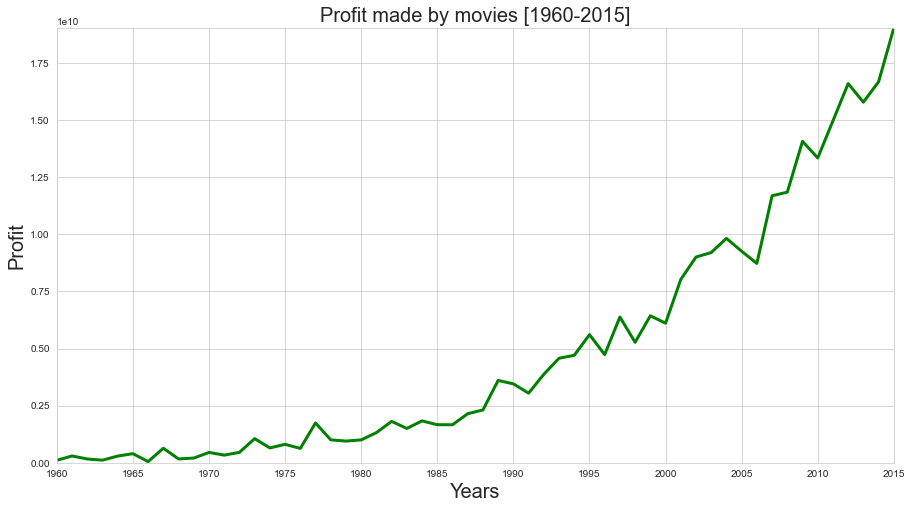

In [19]:
# Plot for the profits
plt.subplots(figsize=(15,8))
plt.plot(movie_revenue['profit'],'g',linewidth=3)
plt.title('Profit made by movies [1960-2015]',fontdict={'fontsize':20})
plt.xlabel('Years',fontdict={'fontsize':20})
plt.ylabel('Profit',fontdict={'fontsize':20})
plt.xticks(np.arange(1960,2020,5))
plt.xlim(left=1960,right=2015)
plt.ylim(bottom=0,top=movie_revenue['profit'].max());

From the diagram above, it shows that the profit of movies keep increasing from year to year which also shows the quality of movies increases every year. Let's see if we have a similar trend in the budgets and revenues.

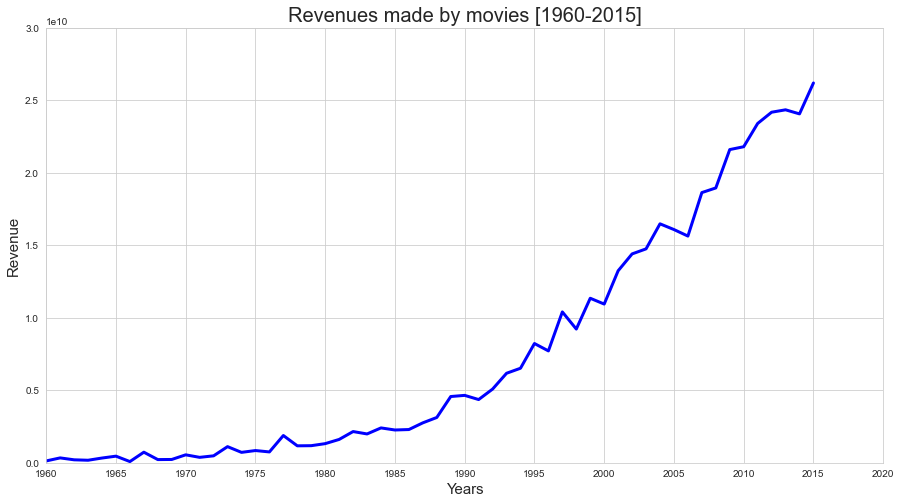

In [20]:
# Plot for revenues
plt.subplots(figsize=(15,8))
plt.plot(movie_revenue['revenue'],'b',linewidth=3)
plt.title('Revenues made by movies [1960-2015]',fontdict={'fontsize':20})
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Revenue',fontdict={'fontsize':15})
plt.xticks(np.arange(1960,2021,5))
plt.xlim(left=1960,right=2020)
plt.ylim(bottom=0,top=30000000000);

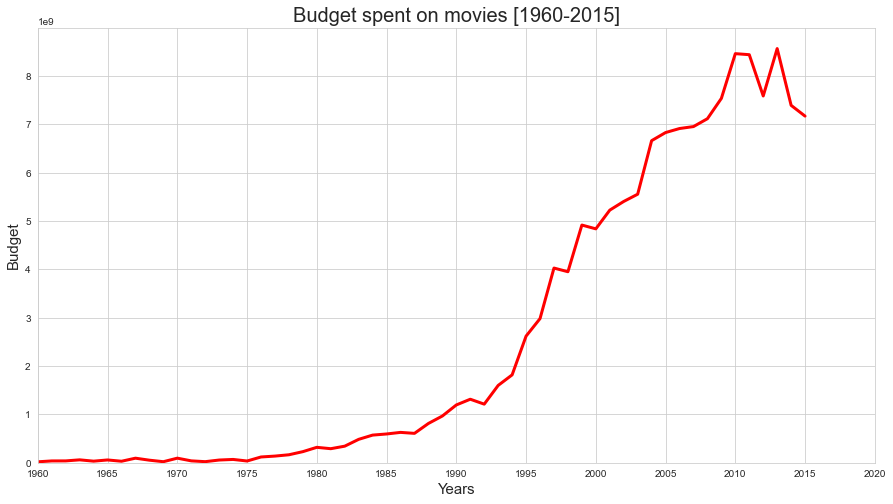

In [21]:
#Plot for Budgets
plt.subplots(figsize=(15,8))
plt.plot(movie_revenue['budget'],'r',linewidth=3)
plt.title('Budget spent on movies [1960-2015]',fontdict={'fontsize':20})
plt.xlabel('Years',fontdict={'fontsize':15})
plt.ylabel('Budget',fontdict={'fontsize':15})
plt.xticks(np.arange(1960,2021,5))
plt.xlim(left=1960,right=2020)
plt.ylim(bottom=0);

From the diagrams above, Revenues and Budgets also follow a similar trend with the Profits but the Budget of the movies start dropping from around 2013. Is there a significant reason for that?

### Research Question 2  
**What year produced the highest rated movies in the Imdb?**

Here, the dataset will be grouped into the release years and the mean of the vote averages will be gotten to determine the Year with the highest rated movies.

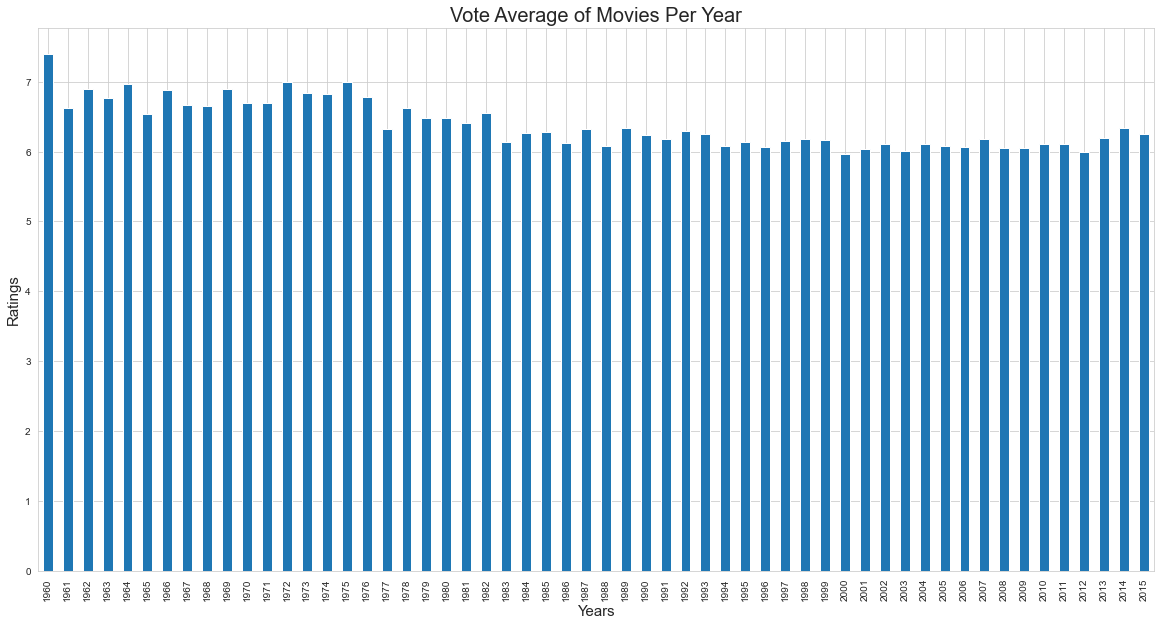

In [22]:
# Grouping the dataset and Plotting the Vote Averages
movie_df.groupby('release_year')['vote_average'].mean().plot(kind='bar',figsize=(20,10))
plt.title('Vote Average of Movies Per Year', fontdict={'fontsize':20})
plt.xlabel('Years', fontdict={'fontsize':15})
plt.ylabel('Ratings',fontdict={'fontsize':15});

From this diagram, it shows that the older movies have a higher rating than the newer ones. Is there any reason for that?

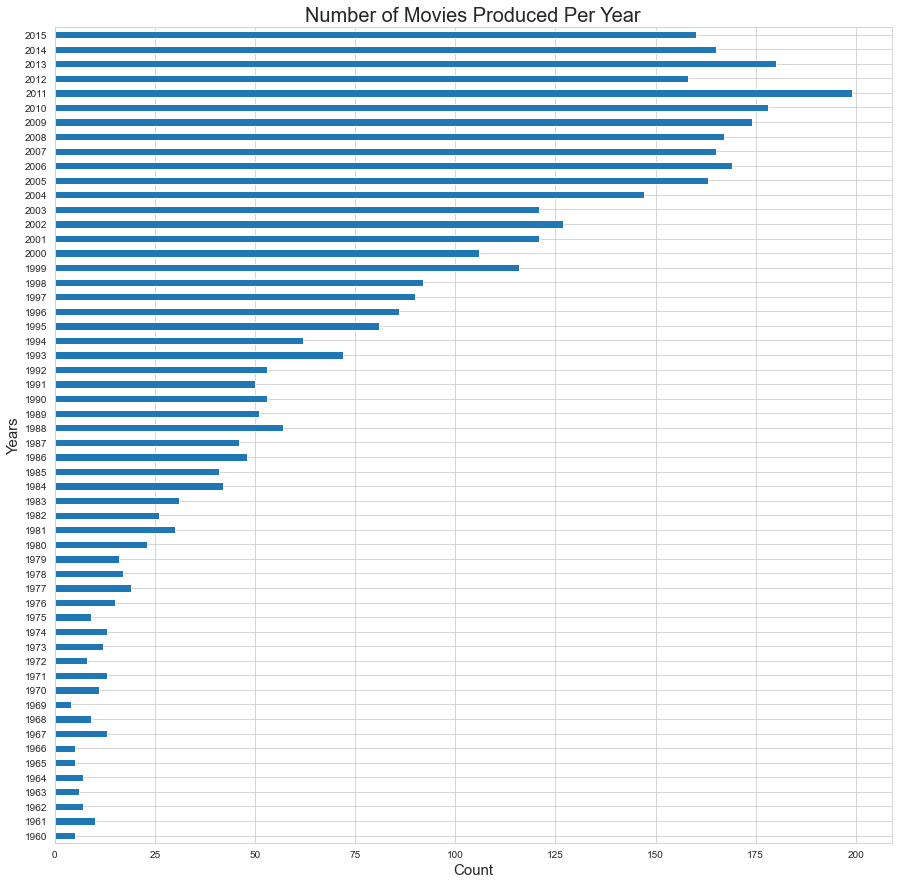

In [23]:
# The Count of values of Movies per year
movie_df['release_year'].value_counts().sort_index(ascending=True).plot(kind='barh',figsize=(15,15))
plt.title('Number of Movies Produced Per Year', fontdict={'fontsize':20})
plt.xlabel('Count', fontdict={'fontsize':15})
plt.ylabel('Years',fontdict={'fontsize':15});

From this diagram, it shows that the number of new age movies are much higher than that of the older ones. This simply shows that quantity doesn't always mean there is quality

### Research Question 3

**Are newer movies longer than they were years ago?**

Over the years, the quality of movies have gone high but can that be said about its plot. In this section, we question whether the movies got longer over the years or shorter.

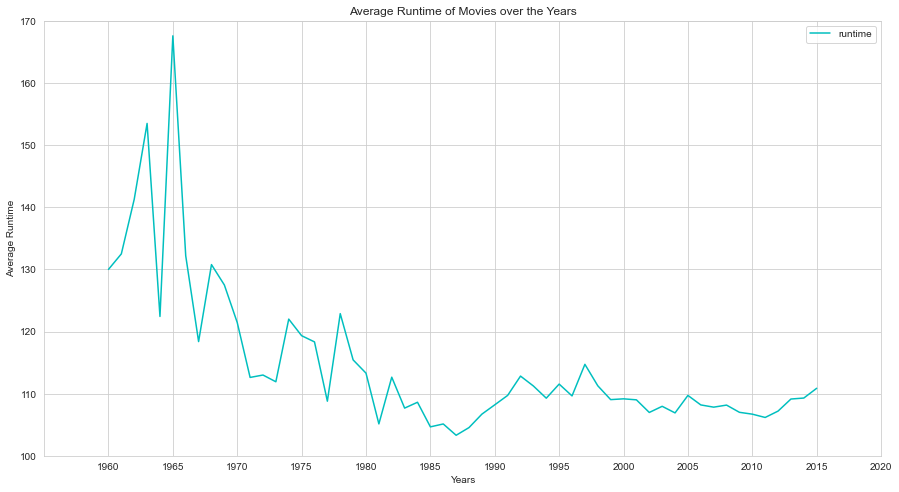

In [24]:
# Group by the release year and get the mean of the runtime 
movie_runtime = movie_df.groupby('release_year',as_index=False)['runtime'].mean()
# Plot the values gotten from the movie_runtime
movie_runtime.plot('release_year','runtime',c='c',figsize=(15,8))
plt.title('Average Runtime of Movies over the Years')
plt.xlabel("Years")
plt.ylabel('Average Runtime')
plt.xticks(np.arange(1960,2021,5))
plt.xlim(left=1955,right=2020)
plt.ylim(bottom=100,top=170);

The runtime of movies has clearly dropped over the years, Is it that the attention span of the viewers have dropped or the quality of the plots have dropped?

### Research Question 4

**Do viewers prefer a shorter movie than a longer one?**

In relation to the last question, Has the attention span of the viewers dropped? Some say the longer the better, Others, not so much. In this section we take a look at how the viewers prefer their movies, Longer or Shorter. 

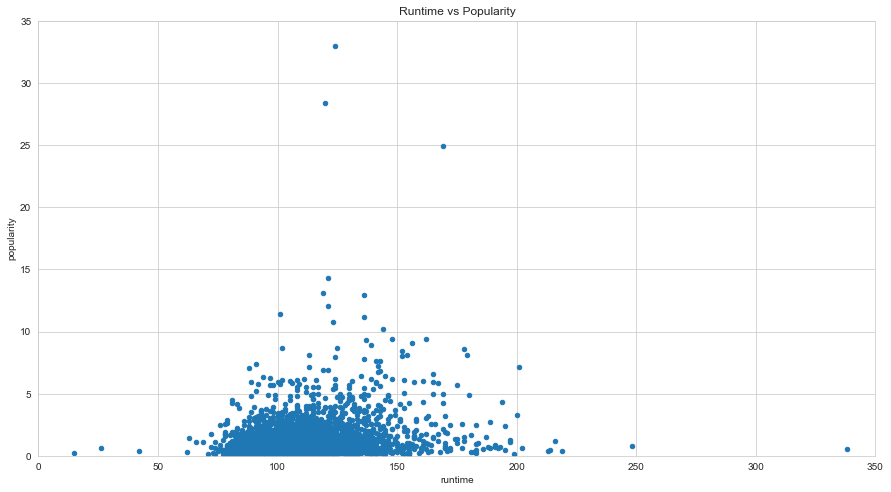

In [25]:
# Plot of runtime against Popularity
movie_df.plot('runtime','popularity',kind='scatter',figsize=(15,8))
plt.title('Runtime vs Popularity')
plt.xlim(left=0,right=350)
plt.ylim(top=35,bottom=0);

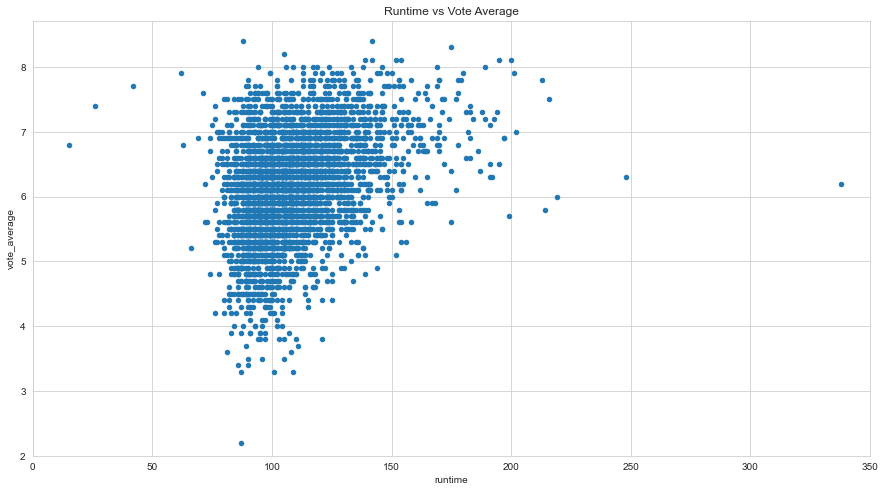

In [26]:
# PLot of runtime against vote_average
movie_df.plot('runtime','vote_average',kind='scatter',figsize=(15,8))
plt.title('Runtime vs Vote Average')
plt.xlim(left=0,right=350)
plt.ylim(bottom=2);

From the diagrams above, the scatter plot is based arounf the 100 to 150 mark but it skewed a bit to the right. This shows that the viewers prefer to watch a shorter movie compared to a longer one.

### Research Question 5

**Do viewers tune in to a well made movie rather than a budgeted one?**

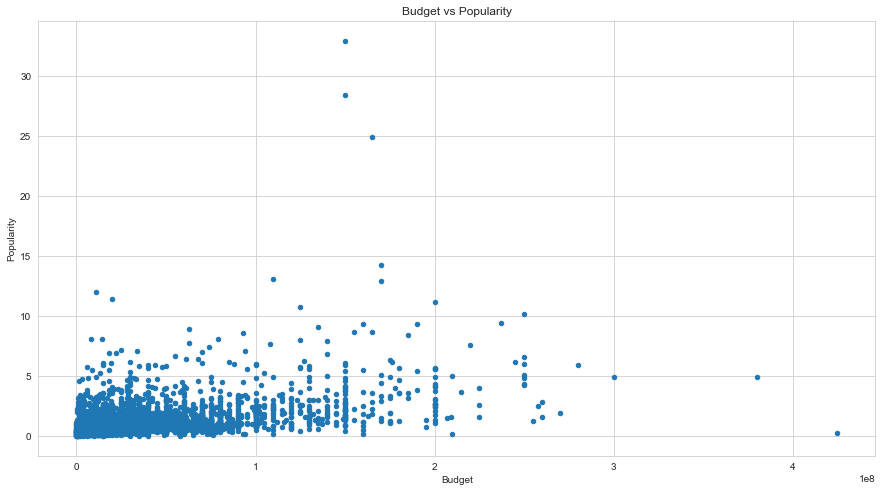

In [27]:
movie_df.plot("budget","popularity",kind="scatter",figsize=(15,8))
plt.title('Budget vs Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity');

This diagram speaks for itself. The viewers prefer to watch a well made movie rather than a budgeted movie.

### Research Question 6

**What kinds of properties are associated with movies that have high revenues?**

In [28]:
median= movie_df['revenue'].median()
median

44800002.5

In [29]:
# Getting movies with high revenue
high_revenue = movie_df.query(f'revenue > {median}')
high_revenue.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015,1.316249e+09


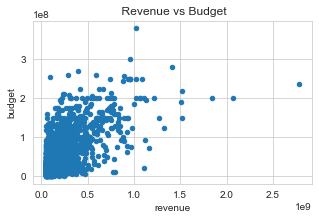

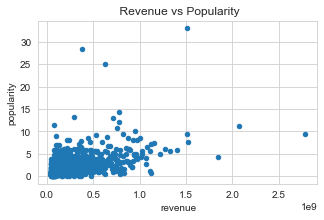

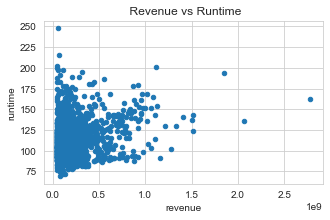

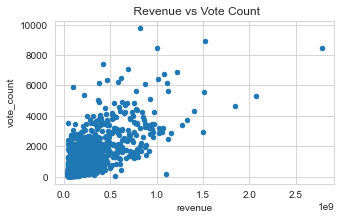

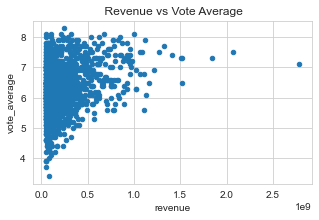

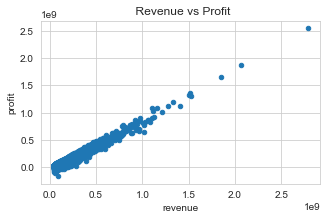

In [30]:
# Plotting the high revenue in relation to other properties
high_revenue.plot(kind='scatter', x='revenue', y='budget', figsize=(5,3), title=' Revenue vs Budget')
high_revenue.plot(kind='scatter', x='revenue', y='popularity', figsize=(5,3), title=' Revenue vs Popularity')
high_revenue.plot(kind='scatter', x='revenue', y='runtime', figsize=(5,3), title=' Revenue vs Runtime')
high_revenue.plot(kind='scatter', x='revenue', y='vote_count', figsize=(5,3), title=' Revenue vs Vote Count')
high_revenue.plot(kind='scatter', x='revenue', y='vote_average', figsize=(5,3), title=' Revenue vs Vote Average')
high_revenue.plot(kind='scatter', x='revenue', y='profit', figsize=(5,3), title=' Revenue vs Profit')
plt.show();

From the diagram above, we derive the conclusion:

* The more the budget put into the work, the better the revenue.
* The more popularity, the more the revenue(slightly).
* There is no much correlation between the two arguments.
* Positive correlation between revenue and vote count.
* There is no much correlation between the two arguments.
* The higher the revenue, the higher the profit.

### Research Question 7

**Which genres are most popular from year to year?**

Every viewer has their favorite genre but which genre was most popular in each year?

In [31]:
#Exploding the genres to have every genres out of the list
movie_genres = movie_df.explode('genres')
movie_genres.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action,2015-06-09,5562,6.5,2015,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Adventure,2015-06-09,5562,6.5,2015,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Science Fiction,2015-06-09,5562,6.5,2015,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Thriller,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action,2015-05-13,6185,7.1,2015,2.284364e+08


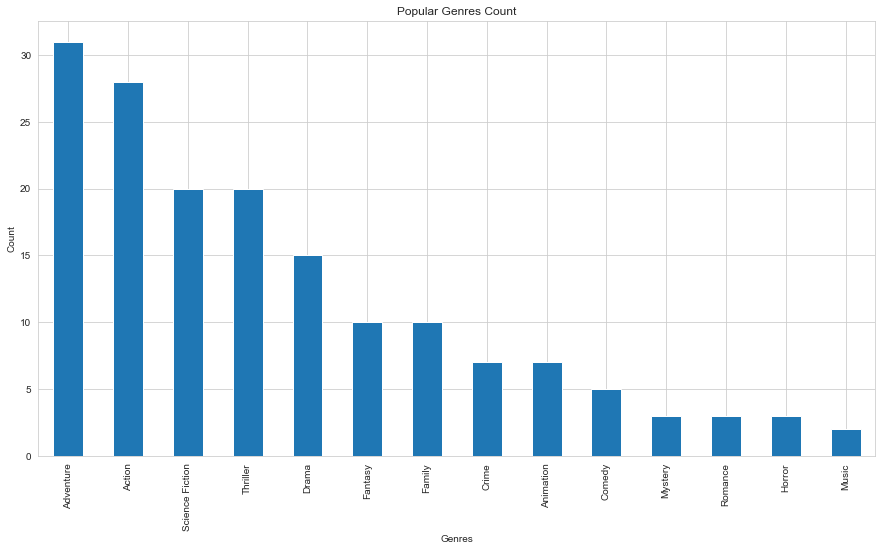

In [32]:
# Index of all the popular movies by the release year
idx = movie_genres.groupby(['release_year'])['popularity'].transform(max) == movie_genres['popularity']

# Counts of the Popular genres in total
genres_counts = movie_genres[idx]['genres'].value_counts()

# Plot of the Genres Count
genres_counts.plot(kind='bar',figsize=(15,8))
plt.title('Popular Genres Count')
plt.xlabel('Genres')
plt.ylabel('Count');

In the figure above, It shows that Adventure and Action are the best genres from 1960 to 2015 and Music is the least popular genres.

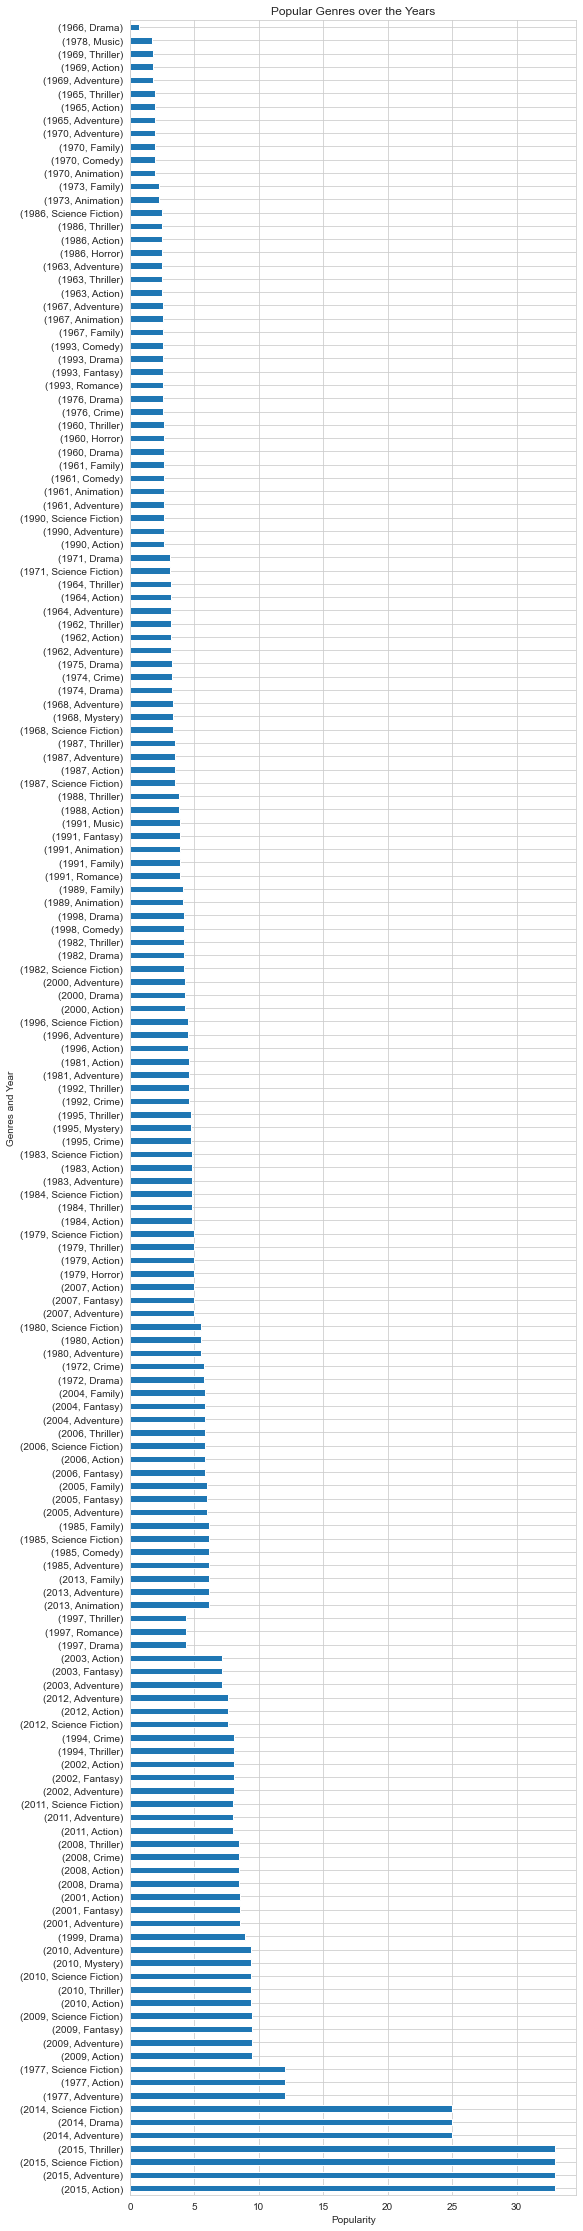

In [33]:
# Getting the Popularity and Genres of the popular movies by their release years
popular_genre = movie_genres[idx].set_index(['release_year','genres'])['popularity']

# Plotting the Popular genres over the years
popular_genre.plot(kind='barh',figsize=(8,40));
plt.title("Popular Genres over the Years")
plt.xlabel('Popularity')
plt.ylabel('Genres and Year');

In the figure above, this shows that the popularity of movies grew massively over the years.

<a id='conclusions'></a>
## Conclusions

In this report,the following conclusion were drawn:

* The Budget, Revenue and Profit of movies have increased massively over the years.
* The Movie Rating have dropped at a steady rate over the years which might because of the quantity of the movies produced which has increased.
* The runtime of movies on average have reduced over the years.
* The attention span of viewers have reduced.
* Viewers prefer a well made movie in terms of the budget spent.
* High revenue is positively correlated with the popularity, profit, budget,etc.
* The most popular genre over the years are Adventure and Action.

This data of over 10000 dataset had many limitations in the aspect of the missing values in the dataset which reduced it to over 3000 dataset which might affect the accuracy of the analysis.